## Repte 4. Models de classificació. NUWE

## Objetivo

El objetivo del ejercicio es el desarrollo de un modelo predictivo de clasificación, que permita a partir de unas variables asociadas a un tumor de mama, predecir si se trata de un tumor benigno o maligno.

Se suministra un juego de datos para poder entrenar el modelo y otros para comprobar su bondad.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
data = pd.read_csv('train.csv', engine='python')

In [3]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,10.710,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,0.3198,1.4890,2.230,20.74,0.008902,0.047850,0.07339,0.017450,0.02728,0.007610,11.690,25.21,76.51,410.4,0.1335,0.2550,0.2534,0.08600,0.2605,0.08701
1,0,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,0.1872,0.9234,1.449,14.55,0.004477,0.011770,0.01079,0.007956,0.01325,0.002551,14.670,23.19,96.08,656.7,0.1089,0.1582,0.1050,0.08586,0.2346,0.08025
2,0,11.710,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,0.1516,0.06095,0.2451,0.7655,1.742,17.86,0.006905,0.008704,0.01978,0.011850,0.01897,0.001671,13.010,21.39,84.42,521.5,0.1323,0.1040,0.1521,0.10990,0.2572,0.07097
3,1,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,0.4390,1.0120,3.498,43.50,0.005233,0.030570,0.03576,0.010830,0.01768,0.002967,20.270,36.71,149.30,1269.0,0.1641,0.6110,0.6335,0.20240,0.4027,0.09876
4,1,14.450,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.015970,0.02000,0.007303,0.01522,0.001976,18.330,30.12,117.90,1044.0,0.1552,0.4056,0.4967,0.18380,0.4753,0.10130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,1,13.170,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,0.1746,0.06177,0.1938,0.6123,1.334,14.49,0.003350,0.013840,0.01452,0.006853,0.01113,0.001720,16.230,29.89,105.50,740.7,0.1503,0.3904,0.3728,0.16070,0.3693,0.09618
451,0,15.100,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,0.4309,1.0680,2.796,39.84,0.009006,0.041850,0.03204,0.022580,0.02353,0.004984,16.110,18.33,105.90,762.6,0.1386,0.2883,0.1960,0.14230,0.2590,0.07779
452,1,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,0.4226,1.1500,2.735,40.09,0.003659,0.028550,0.02572,0.012720,0.01817,0.004108,17.870,30.70,115.70,985.5,0.1368,0.4290,0.3587,0.18340,0.3698,0.10940
453,0,9.606,16.84,61.64,280.5,0.08481,0.09228,0.08422,0.02292,0.2036,0.07125,0.1844,0.9429,1.429,12.07,0.005954,0.034710,0.05028,0.008510,0.01750,0.004031,10.750,23.07,71.25,353.6,0.1233,0.3416,0.4341,0.08120,0.2982,0.09825


El dataset contiene 30 variables que pueden tener influencia en la diagnosis del cáncer y una columna con la diagnosis: 0 si es benigno y 1 si es maligno. 

## Análisis exploratorio del dataset

- **Comprobación de valores nulos**

In [18]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Observamos que no tenemos valores nulos

- **Tamaño y tipo de datos**

In [4]:
print('El dataset tiene', data.shape[0], 'registros y', data.shape[1], 'columnas.')

El dataset tiene 455 registros y 31 columnas.


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                455 non-null    int64  
 1   radius_mean              455 non-null    float64
 2   texture_mean             455 non-null    float64
 3   perimeter_mean           455 non-null    float64
 4   area_mean                455 non-null    float64
 5   smoothness_mean          455 non-null    float64
 6   compactness_mean         455 non-null    float64
 7   concavity_mean           455 non-null    float64
 8   concave points_mean      455 non-null    float64
 9   symmetry_mean            455 non-null    float64
 10  fractal_dimension_mean   455 non-null    float64
 11  radius_se                455 non-null    float64
 12  texture_se               455 non-null    float64
 13  perimeter_se             455 non-null    float64
 14  area_se                  4

El target es un entero y el resto de las variables son float

- **Principales estadísticas del dataset**

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,455.0,0.373626,0.484299,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,455.0,14.139000,3.625935,6.981000,11.705000,13.300000,15.740000,28.11000
texture_mean,455.0,19.306286,4.267421,9.710000,16.210000,18.890000,21.795000,39.28000
perimeter_mean,455.0,92.086044,24.998077,43.790000,75.015000,85.980000,103.650000,188.50000
area_mean,455.0,657.829890,363.536865,143.500000,419.250000,546.400000,777.250000,2501.00000
smoothness_mean,455.0,0.096849,0.013981,0.052630,0.086740,0.096860,0.106050,0.16340
compactness_mean,455.0,0.105557,0.052932,0.019380,0.066735,0.094860,0.130450,0.34540
concavity_mean,455.0,0.090775,0.080993,0.000000,0.030180,0.063870,0.132200,0.42680
concave points_mean,455.0,0.049585,0.039159,0.000000,0.020720,0.033840,0.074490,0.20120
symmetry_mean,455.0,0.181319,0.027140,0.116700,0.162050,0.179700,0.195800,0.30400


De las estadísticas obtenidas observamos:
- Las variables tienen escalas muy diferentes entre ellas
- Las variables tienen distribuciones diferentes, desde las que media y moda son similares a las que no
- Hay algunas variables que presentan distribuciones con largas colas

- **Distribuciones de las variables**

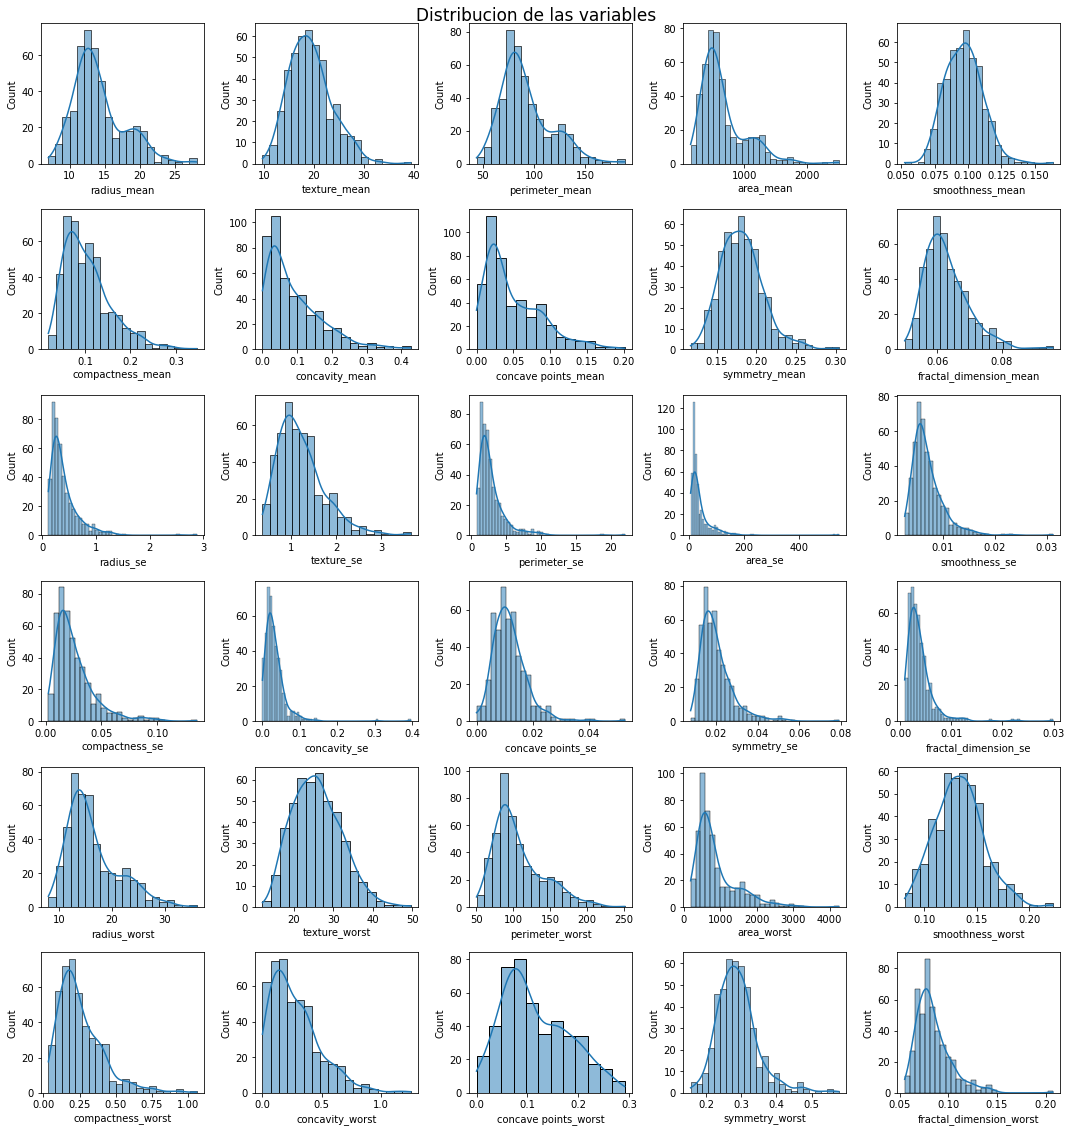

In [6]:
# Representamos gráficamente la distribución de todas las variables
variables = list(data.columns)[1:]

f, axes = plt.subplots(6,5, figsize = (15, 16))
f.suptitle('Distribucion de las variables', fontsize = 17 )

for i, ax in enumerate(axes.flatten()): 
    sns.histplot(data[variables].iloc[: , i], ax = ax, kde=True);
plt.tight_layout(); 

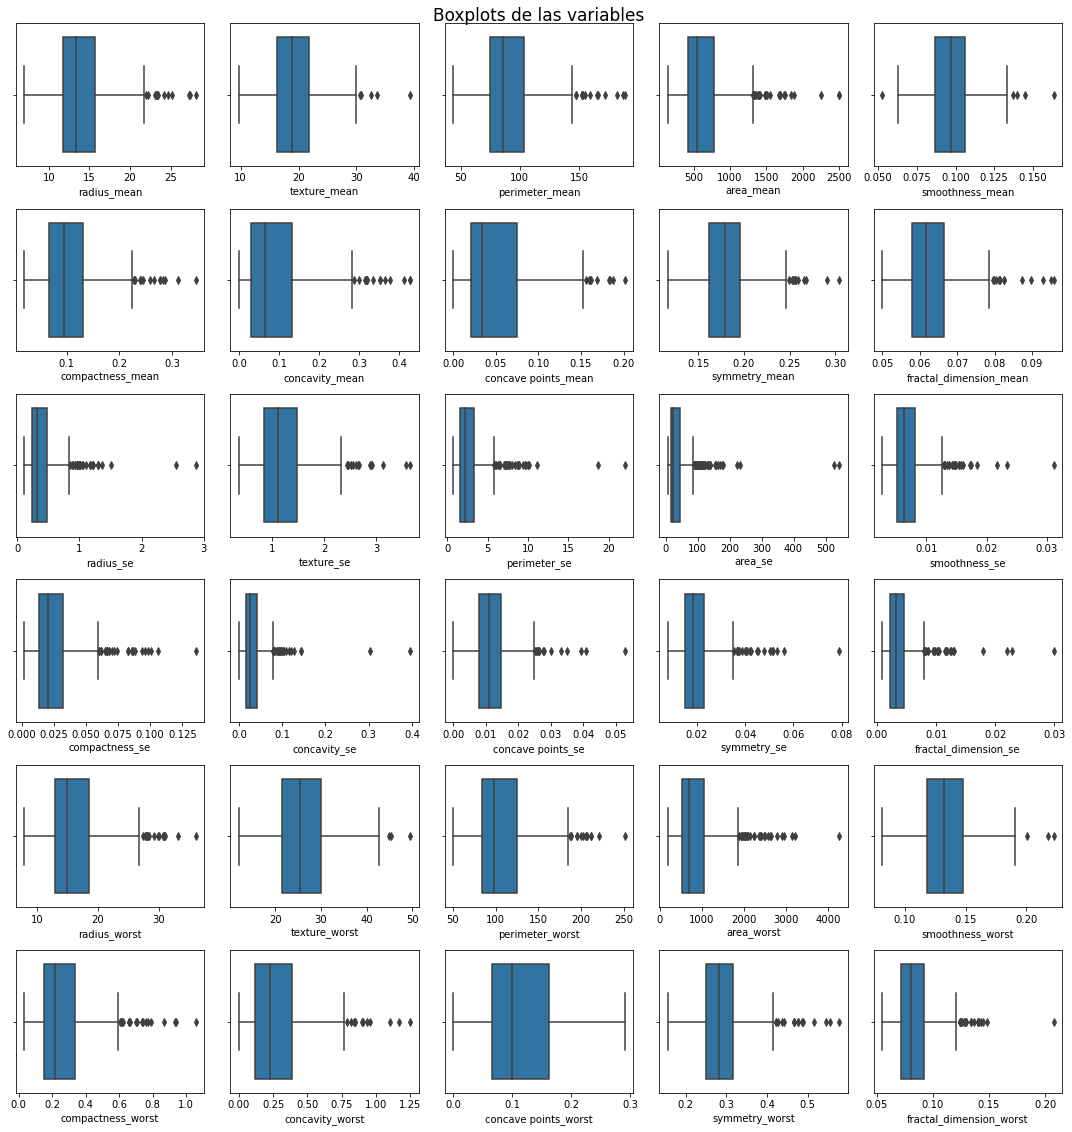

In [7]:
#Representamos gráficamente el boxplot de las variables con objeto de examinar los outliers
f, axes = plt.subplots(6,5, figsize = (15, 16))
f.suptitle('Boxplots de las variables', fontsize = 17 )

for i, ax in enumerate(axes.flatten()): 
    sns.boxplot(x=data[variables].iloc[: , i], ax = ax);
plt.tight_layout(); 

De las distrubiciones de las variables y de la representación de outliers concluímos:
- Pocas variables presentan distribuciones más o menos simétricas. Y muy pocas que puedan asimilarse a distribuciones normales
- La mayor parte de las variables presentan colas más o menos largas
- Casi todas las variables tienen outliers, en mayor o menor cantidad, más o menos alejados

- **Correlación entre las variables**

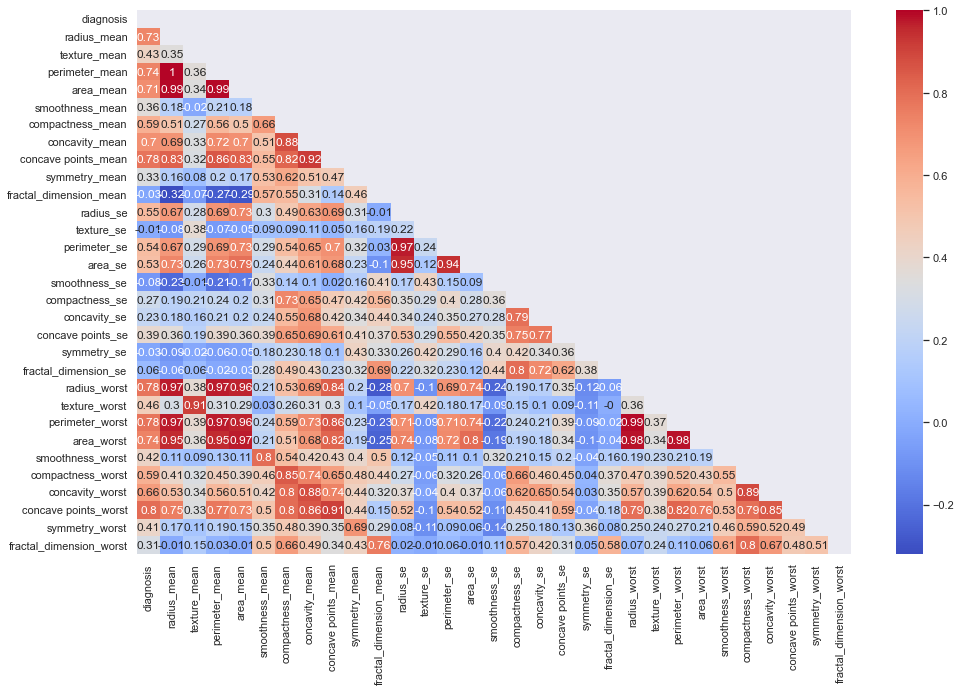

In [8]:
#Obtenemos la matriz de correlación entre las variables
matriz_corr=data.corr().round(2)
mascara = np.triu(data.corr())
sns. set (rc = {"figure.figsize" :( 16, 10 )})
sns.heatmap(matriz_corr, annot=True, mask=mascara, cmap='coolwarm');

Observamos que existen algunas variables con una alta correlación con otras. Seleccionamos las variables que tienen una correlación con otra superior al 0.95

In [9]:
#Variables con correlación >0.95
corr_matrix = data.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


Tiene sentido que la variables que indican perímetro, radios, diámetros y áreas estén altamente correlacionadas entre ellas.      
**Eliminaremos las variables de la lista to_drop** para evitar distorsionar el modelo ya que podría añadir más peso a dichas variables. Dejamos por tanto sólo una por concepto.    
Observamos que existen otras variables con alta correlación. Como el nombre de la variable hace referencia a conceptos distintos y al no tener conocimientos médicos, decidimos no eliminarlas

- **Análisis del target**

In [10]:
data.diagnosis.value_counts(normalize=True)

0    0.626374
1    0.373626
Name: diagnosis, dtype: float64

Observamos que el 62,6% de los datos son 0 (benignos) y el 37.3% son 1 (malignos). Aunque no está perfectamente balanceado, trabajaremos con estos datos y no utilizaremos técnicas de balanceado porque el ratio de balanceo no es tan malo. En función de los resultados, intentaremos posteriormente balancear los datos.

- **Ingeniería de variables**

Realizaremos la siguiente ingeniería de variables:
- Eliminaremos variables con correlación con otras variables superior a 0.95
- Escalaremos las variables mediante RobustScaler ya que tenemos muchos outliers y así minimizaremos su efecto

In [11]:
#Eliminamos las variables correlación >0.95
data.drop(data[to_drop], axis='columns', inplace=True)

In [12]:
#Separamos las variables del target
features= list(data.columns)[1:]
X=data[features]
y=data.diagnosis

#Escalamos las variables con RobustScaler
X=RobustScaler().fit_transform(X)
X = pd.DataFrame(X, columns= features)

- **Construcción del modelo**

Probaremos los siguientes modelos según sus parámetros por defecto para detectar los que puedan adaptarse mejor al dataset:      Logistic Regression, Decision Tree, Random Forest, Balanced Bagging Classifier (que balancea previamente los datos), AdaBoostClassifier, K-Nearest Neighbor.

Previamente dividiremos el dataset en Train/Test al 20%, ya que disponemos de pocos datos.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 5)

In [14]:
models = {}                                             #Diccionario con los modelos a testear
models['Logistic Regression'] = LogisticRegression(random_state=0)
models['Decision Tree'] = DecisionTreeClassifier(random_state=0)
models['Random Forest'] = RandomForestClassifier(random_state=0)
models['Balanced Bagging Classifier'] = BalancedBaggingClassifier(base_estimator= RandomForestClassifier(),random_state=0)
models['AdaBoostClassifier'] = AdaBoostClassifier(random_state=0)
models['K-Nearest Neighbor'] = KNeighborsClassifier()

accuracy, precision, recall, f1, roc = {}, {}, {}, {}, {}        #Diccionario con las métricas a utilizar

for key in models.keys():
    models[key].fit(X_train, y_train)
    predictions = models[key].predict(X_test)                  # Predicción
       
    accuracy[key] = accuracy_score(predictions, y_test)        # Cálculo de las métricas
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)
    roc[key] = roc_auc_score(predictions, y_test)
    
metricas = pd.DataFrame(columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1', 'Roc_Auc'])  #Crea DF métricas
metricas['Modelo'] = models.keys()
metricas['Accuracy'] = accuracy.values()
metricas['Precision'] = precision.values()
metricas['Recall'] = recall.values()
metricas['F1'] = f1.values()
metricas['Roc_Auc'] = roc.values()

In [15]:
#Vemos las métricas de los diferentes modelos
metricas

,Modelo,Accuracy,Precision,Recall,F1,Roc_Auc
0,Logistic Regression,0.956044,0.87500,1.000000,0.933333,0.968254
1,Decision Tree,0.923077,0.90625,0.878788,0.892308,0.913532
2,Random Forest,0.956044,0.90625,0.966667,0.935484,0.958743
3,Balanced Bagging Classifier,0.934066,0.90625,0.906250,0.906250,0.927701
4,AdaBoostClassifier,0.967033,0.96875,0.939394,0.953846,0.961076
5,K-Nearest Neighbor,0.956044,0.87500,1.000000,0.933333,0.968254


In [16]:
#Calculamos la matriz de confusión de los modelos
print('Matriz de confusión de los modelos:')
for key in models.keys():
    print(key)
    print(confusion_matrix(y_test, models[key].predict(X_test)))
    print()


Matriz de confusión de los modelos:
Logistic Regression
[[59  0]
 [ 4 28]]

Decision Tree
[[55  4]
 [ 3 29]]

Random Forest
[[58  1]
 [ 3 29]]

Balanced Bagging Classifier
[[56  3]
 [ 3 29]]

AdaBoostClassifier
[[57  2]
 [ 1 31]]

K-Nearest Neighbor
[[59  0]
 [ 4 28]]



- **Análisis de las métricas y matriz de confusión**

Observamos que los modelos que presentan un mejor desempeño (a falta de ajustar los hiperparámetros) son Logistic Regression, Random Forest, AdaBoostClassifier y k-Nearest Neighbor.     

Igualmente las matrices de confusión reflejan la bondad de los 4 modelos comentados. 

**Seleccionamos Logistic AdaBoostClassifier** ya que:
- Presenta las mejores métricas en cuanto a accuracy, precision y F1 Score
- Presenta un mayor número de aciertos
- Minimiza los falsos negativos. En una detección de tumores interesa detectar el máximo de positivos

- **Cross Validation**   
Usaremos cross validation sobre el modelo seleccionado para determinar si hay overfiting. Lo aplicamos sobre la métrica F1

In [17]:
modelo=models['AdaBoostClassifier']
scores = cross_val_score(modelo, X, y, scoring= 'f1', cv = 10)
print('f1 Score: {0}     std_F1 Score: {1}'.format(np.mean(scores).round(4), np.std(scores).round(4)))

f1 Score: 0.9337     std_F1 Score: 0.0293


Observamos que al aplicar cross validation sobre el total de los datos obtenemos un F1 Score similar al obtenido mediante Train/Test. La desviación estándard de los 10 valores es muy baja, por lo que podemos concluir que no se está produciendo overfitting en nuestro modelo

- **Ajuste de hiperparámetros**

Intentamos mejorar los modelos mediante **GridSearch**, optimizando F1 Score

In [18]:
#Vemos los parámetros del modelo inicial
models['AdaBoostClassifier'].get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 0}

In [19]:
#Seleccionamos los parámetros a optimizar con GridSearch
parameters ={'algorithm': ['SAMME.R', 'SAMME'], 'n_estimators': [25, 50, 75, 100, 150, 175, 200], 'learning_rate': [0.5,1.0, 1.5, 2.0]}

#Definimos el GridSearch
ab_gs = GridSearchCV(estimator = AdaBoostClassifier(random_state=0), param_grid = parameters, scoring = 'f1')

#Entrenamos el GridSearch
ab_gs.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(random_state=0),
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [25, 50, 75, 100, 150, 175, 200]},
             scoring='f1')

In [20]:
print ('Best Parameters: ', ab_gs.best_params_, ' \n')
print ('Best f1 score: ', ab_gs.best_score_, ' \n')

Best Parameters:  {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 150}  

Best f1 score:  0.9338332729097376  



- **Modelo final**

In [ ]:
Entrenamos el modelo final (AdaBoostClassifier) con los parámetros optimizados por GridSearch y con los datos Train/Test

In [21]:
ab= AdaBoostClassifier(n_estimators= 150, learning_rate= 1.5, algorithm= 'SAMME', random_state=0)
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5, n_estimators=150,
                   random_state=0)

In [22]:
#Calculamos sus métricas
accuracy = accuracy_score(ab.predict(X_test), y_test)
precision = precision_score(ab.predict(X_test), y_test)
recall = recall_score(ab.predict(X_test), y_test)
f1 = f1_score(ab.predict(X_test), y_test)
roc = roc_auc_score(ab.predict(X_test), y_test)

#Añadimos sus metricas a la matriz de métricas anterior
metricas=metricas.append({'Modelo':'AdaBoost Optimizado','Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1':f1, 'Roc_Auc':roc}, ignore_index=True)


In [23]:
metricas

,Modelo,Accuracy,Precision,Recall,F1,Roc_Auc
0,Logistic Regression,0.956044,0.87500,1.000000,0.933333,0.968254
1,Decision Tree,0.923077,0.90625,0.878788,0.892308,0.913532
2,Random Forest,0.956044,0.90625,0.966667,0.935484,0.958743
3,Balanced Bagging Classifier,0.934066,0.90625,0.906250,0.906250,0.927701
4,AdaBoostClassifier,0.967033,0.96875,0.939394,0.953846,0.961076
5,K-Nearest Neighbor,0.956044,0.87500,1.000000,0.933333,0.968254
6,AdaBoost Optimizado,0.978022,0.96875,0.968750,0.968750,0.975900


Observamos que con la optimización de hiperparámetros hemos mejorado en todas las métricas excepto en Precision que queda igual

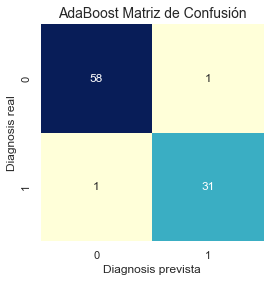

In [24]:
# confusion matrix 
ab_opt_cm = confusion_matrix(y_test, ab.predict(X_test))

labels = [0, 1]
plt.figure(figsize= (4,4))
sns.heatmap(pd.DataFrame(ab_opt_cm), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('AdaBoost Matriz de Confusión', fontsize = 14)
plt.ylabel('Diagnosis real',fontsize = 12 )
plt.xlabel('Diagnosis prevista', fontsize = 12);

También hemos mejorado la matriz de confusión ya que tenemos un caso menos de falsos positivos

- **Aplicación del modelo** 

Aplicamos el modelo al dataset de Test suministrado.

Desarrollamos un Pipeline que incluya el preprocesado de los datos

In [39]:
test = pd.read_csv('test.csv', engine='python')

In [40]:
#Preparamos el preprocesado de datos
columns_to_drop = ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']
preprocesado= ColumnTransformer(
                transformers = [('escalado', RobustScaler(), test.columns),
                                ('drop_columns', 'drop', columns_to_drop),])
#Preparamos el modelo
modelo_opt = AdaBoostClassifier(n_estimators= 150, learning_rate= 1.5, algorithm= 'SAMME', random_state=0)

#Preparamos la pipeline
pipeline = Pipeline( steps= [
                    ('preprocessor', preprocesado),
                    ('model', modelo_opt)])

In [43]:
#Entrenamos el pipeline con todos los datos del train
data_p = pd.read_csv('train.csv', engine='python')  
features= list(data_p.columns)[1:]
X=data_p[features]
y=data_p.diagnosis

pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('escalado', RobustScaler(),
                                                  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness...
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                                 ('drop_columns', 'drop',
                                                  ['perimeter_mean',
                                                   'area_mean', 'perimeter_se',
                                                   'area_se', 'radius_worst',
                       

In [ ]:
Obtenemos los resultados con el dataset de test y generamos archivo .csv

In [53]:
resultado=pipeline.predict(test)
resultado

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0], dtype=int64)

In [55]:
#Generamos un dataframe con los resultados
resultado_df=pd.DataFrame({'Resultado': resultado})
resultado_df.head()

,Resultado
0,0
1,0
2,0
3,1
4,0


In [56]:
#Creamos archivo con los resultados
resultado_df.to_csv('resultado.csv', index = False )

## Conclusiones:
- Hemos seleccionado el modelo AdaBoostClassifier porque ofrecía mejores resultados en comparación con los otros modelos
- Aplicando cross validation hemos comprobado que el modelo se mantiene estable y que no se producía overfitting
- Mediante GridSearch hemos ajustado los hiperparámetros mejorando el modelo inicial. La F1_Score final es del 0.968 con los datos de train